<b>Resources:</b>

https://docs.genius.com/

In [2]:
#assuming full discography already created from DISCOGS API
import pandas as pd
discog = pd.read_csv('sample_discography.csv')

In [3]:
discog.head()

,year,album,track_position,track_title
0,1984,From Her To Eternity,1,Avalanche
1,1984,From Her To Eternity,2,Cabin Fever!
2,1984,From Her To Eternity,3,Well Of Misery
3,1984,From Her To Eternity,4,From Her To Eternity
4,1984,From Her To Eternity,5,Saint Huck


In [5]:
# connection to GENIUS LYRICS API
import lyricsgenius
# authenticate to GENIUS.COM
genius = lyricsgenius.Genius("yUrV_dD4VMSNbqnx4GERtNJAdeX1121T1OqR8nZMtbQI7Tsi1vrc2Hpxmgrb0l-S")

In [6]:
genius

In [16]:
genius.verbose = False # Turn off status messages
genius.remove_section_headers = True # Remove section headers (e.g. [Chorus]) from lyrics when searching

In [22]:
for track in discog.track_title:
    song = genius.search_song(track, "Nick Cave and the Bad Seeds")
    discog.loc[discog.track_title == track, 'lyrics'] = song.lyrics

In [38]:
discog.head(2)

,year,album,track_position,track_title,lyrics
0,1984,From Her To Eternity,1,Avalanche,I stepped into an avalanche\nIt covered up my ...
1,1984,From Her To Eternity,2,Cabin Fever!,The Captain's fore-arm like bunched-up rope\nW...


In [63]:
# remove line breaks "\n" from lyrics str
discog['lyrics_cleaned'] = discog['lyrics'].apply(lambda x: x.replace('\n',' '))
# remove speacial characters except alphanumeric, dash "-" and aposhtrophy "'"
import re
discog['lyrics_cleaned'] = discog['lyrics'].apply(lambda x: re.sub("[^A-Za-z0-9-']+", ' ', x))

In [40]:
discog.head(2)

,year,album,track_position,track_title,lyrics,lyrics_cleaned
0,1984,From Her To Eternity,1,Avalanche,I stepped into an avalanche\nIt covered up my ...,I stepped into an avalanche It covered up my s...
1,1984,From Her To Eternity,2,Cabin Fever!,The Captain's fore-arm like bunched-up rope\nW...,The Captain's fore-arm like bunched-up rope Wi...


In [64]:
# compare before and after cleaning
#song_name = "Ghosteen"
#print('BEFORE:')
#print(discog.lyrics[discog.track_title==song_name].iloc[0])
#print('AFTER:')
#print(discog.lyrics_cleaned[discog.track_title==song_name].iloc[0])

In [69]:
# add number of unique words in each song
discog['unique_words'] = discog.lyrics_cleaned.apply(lambda x: len(set(x.split(' '))))

In [72]:
pd.pivot_table(discog, index = 'year', values = 'unique_words', aggfunc = 'mean')

,unique_words
year,
1984,178.571429
1985,140.428571
1986,97.700000
1988,142.900000
1990,82.333333
1992,148.888889
1994,145.300000
1996,205.100000
1997,113.416667


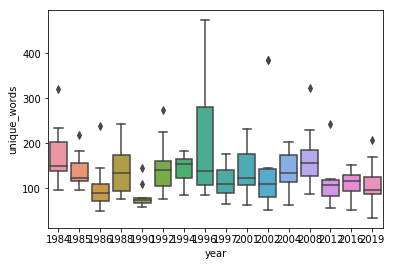

In [74]:
%matplotlib inline
import seaborn as sns
sns.boxplot(x = 'year', y = 'unique_words', data = discog)

In [ ]:
# There are various options configurable as parameters within the Genius class:
#genius.verbose = False # Turn off status messages
#genius.remove_section_headers = True # Remove section headers (e.g. [Chorus]) from lyrics when searching
#genius.skip_non_songs = False # Include hits thought to be non-songs (e.g. track lists)
#genius.excluded_terms = ["(Remix)", "(Live)"] # Exclude songs with these words in their title

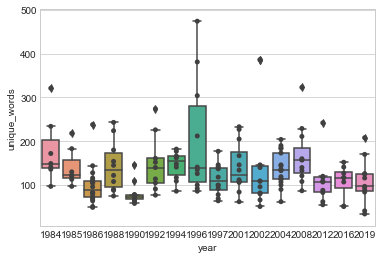

In [75]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="year", y="unique_words", data=discog)
ax = sns.stripplot(x="year", y="unique_words", data=discog, color=".25")

In [68]:
e = discog.lyrics_cleaned[discog.track_title==song_name].iloc[0]
len(set(e.split(' ')))

170

In [77]:
#save output
discog.to_csv('sample_discography_w_lyrics.csv', index =False)